## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import shap

## Reading data

Note that we dismiss Canary Islands, Balearic Islands Ceuta and Melilla because they are not considered in the demand data 

In [2]:
cities = pd.read_csv('cities_unified.csv', header = 0)
cities = cities[(cities['Provincias'] != 'Melilla') & (cities['Provincias'] != 'Ceuta') & (cities['Provincias'] != 'Santa Cruz de Tenerife') & (cities['Provincias'] != 'Palmas, Las') & (cities['Provincias'] != 'Balears, Illes')]
cities.reset_index(drop=True, inplace = True)
cities.index=cities['Codigos']
cities

,Codigos,Provincias,Latitud,Longitud,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Codigos,,,,,,,,,,,,,,
1,1,Araba/Álava,42.835126,-2.720603,321932,323648,324126,326574,328868,331549,333940,333626,334412,336308
2,2,Albacete,38.825409,-1.980373,396987,394580,392118,390032,388786,388167,388270,386464,385727,387529
3,3,Alicante/Alacant,38.478638,-0.568699,1868438,1855047,1836459,1825332,1838819,1858683,1879888,1881762,1901594,1955268
4,4,Almería,37.196085,-2.344813,701688,701211,704297,706672,709340,716820,727945,731792,740534,753364
5,5,Ávila,40.571037,-4.945535,167015,164925,162514,160700,158498,157640,157664,158421,158140,159764
6,6,Badajoz,38.709771,-6.141585,690929,686730,684113,679884,676376,673559,672137,669943,666971,666049
8,8,Barcelona,41.731001,1.984054,5523784,5523922,5542680,5576037,5609350,5664579,5743402,5714730,5727615,5797356
9,9,Burgos,42.368713,-3.585742,366900,364002,360995,358171,357070,356958,357650,356055,355045,357370
10,10,Cáceres,39.711890,-6.160822,408703,406267,403665,400036,396487,394151,391850,389558,387805,388257


In [3]:
ipc = pd.read_csv('IPC.csv', header = 0)
ipc = ipc[(ipc['Provincia'] != 'Melilla') & (ipc['Provincia'] != 'Ceuta') & (ipc['Provincia'] != 'Santa Cruz de Tenerife') & (ipc['Provincia'] != 'Palmas, Las') & (ipc['Provincia'] != 'Balears, Illes')]
ipc.reset_index(drop=True, inplace = True)
ipc.tail()

,Codigo,Provincia,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014,7-2014,8-2014,...,3-2023,4-2023,5-2023,6-2023,7-2023,8-2023,9-2023,10-2023,11-2023,12-2023
43,47,Valladolid,93498,93451,93566,94419,94369,94419,93600,93776,...,111670,112360,112194,112770,112780,113328,113457,114086,113459,113537
44,48,Bizkaia,92529,92402,92640,93555,93525,93561,92738,92900,...,111128,111660,111744,112665,112700,113205,113485,113534,113198,113152
45,49,Zamora,93284,93234,93511,94390,94414,94352,93307,93525,...,113086,113937,113791,114536,114620,115011,115115,115517,114885,115055
46,50,Zaragoza,93588,93570,93708,94676,94661,94614,93792,93965,...,110967,111417,111269,111873,112310,112893,112907,113042,112828,112710
47,0,TOTAL ESPAÑA,93373,93333,93541,94373,94395,94421,93533,93681,...,111111,111773,111719,112354,112544,113149,113348,113676,113280,113308


In [4]:
demanda_meteo = pd.read_csv('demanda_meteo.csv', header = 0)
demanda_meteo['Datetime'] = pd.to_datetime(demanda_meteo['Datetime'])
demanda_meteo.head()

,Datetime,Demanda Real,Demanda Prevista,Demanda Programada,Demanda D+1,Precio,temperature_2m_1,direct_normal_irradiance_instant_1,wind_speed_100m_1,temperature_2m_2,...,wind_speed_100m_50,temperature_2m_51,direct_normal_irradiance_instant_51,wind_speed_100m_51,temperature_2m_52,direct_normal_irradiance_instant_52,wind_speed_100m_52,temperature_2m_0,direct_normal_irradiance_instant_0,wind_speed_100m_0
0,2014-01-01 00:00:00,24301.66667,23878.33333,24099.0,0.0,37.21,7.4985,0.0,16.099690,7.874,...,30.758411,11.714001,0.0,17.339897,10.032000,0.0,11.659777,5.791485,0.0,18.565381
1,2014-01-01 01:00:00,23365.33333,23322.00000,22269.0,0.0,30.57,7.0485,0.0,17.388409,7.724,...,30.312773,11.614000,0.0,18.000000,9.731999,0.0,10.661107,5.709594,0.0,18.443398
2,2014-01-01 02:00:00,21672.50000,21711.16667,21136.0,0.0,26.30,7.3985,0.0,19.319628,7.574,...,27.792374,11.564000,0.0,17.651016,9.932000,0.0,11.212135,5.620734,0.0,18.401250
3,2014-01-01 03:00:00,20192.00000,20230.33333,19911.0,0.0,26.18,7.3485,0.0,20.140705,7.424,...,25.772078,11.464001,0.0,18.430452,10.432000,0.0,12.620554,5.597380,0.0,18.198554
4,2014-01-01 04:00:00,19220.66667,19215.33333,19060.0,0.0,22.40,7.4985,0.0,21.995380,7.374,...,23.732710,11.464001,0.0,18.161278,10.582000,0.0,14.058450,5.656951,0.0,18.100382


In [5]:
festivos = pd.read_csv('Festivos.csv', header = 0)
festivos['Day'] = pd.to_datetime(festivos['Day'])
festivos = festivos.drop(['Melilla', 'Ceuta', 'Santa Cruz de Tenerife', 'Palmas, Las', 'Balears, Illes'], axis = 1)
festivos.head()

,Day,Day of the week,"Coruña, A",Albacete,Alicante/Alacant,Almería,Araba/Álava,Asturias,Badajoz,Barcelona,...,Soria,Tarragona,Teruel,Toledo,Valencia/València,Valladolid,Zamora,Zaragoza,Ávila,sumafest
0,2014-01-01,X,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.000000
1,2014-01-02,J,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019659
2,2014-01-03,V,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,2014-01-04,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,2014-01-05,D,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000


In [6]:
pib = pd.read_csv('PIB.csv', header = 0)
pib.head()

,Codigo,Provincia,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014,7-2014,8-2014,...,3-2023,4-2023,5-2023,6-2023,7-2023,8-2023,9-2023,10-2023,11-2023,12-2023
0,0,TOTAL ESPAÑA,925468,925468,925468,969598,969598,969598,960418,960418,...,1099141,1139036,1139036,1139036,1127405,1127405,1127405,1171293,1171293,1171293


## X and Y creation and definition of the metrics

In [7]:
ndays_base = 28
ntemps = 5
nrads = 5
normalization = True
name_file = str(ndays_base)+'Days-'+str(ntemps)+'Temps-'+str(nrads)+'Rads.csv'

In [8]:
combined_base = pd.read_csv('./Base Inputs/Variations/'+name_file,header=0)
combined_base['Datetime'] = pd.to_datetime(combined_base['Datetime'])

In [9]:
cols = combined_base.columns
if normalization:
    normalization_parameters = {i:[] for i in cols[4:]}
    for name in cols[4:]:
        aux = combined_base[name].values
        delta = max(aux)-min(aux)
        minimo = min(aux)
        normalization_parameters[name].append(delta)
        normalization_parameters[name].append(minimo)
        aux = (aux - min(aux))/(max(aux)-min(aux))
        combined_base[name] = aux
    normalization_parameters = pd.DataFrame(normalization_parameters)
    normalization_parameters = normalization_parameters.rename(index={0: 'Delta', 1: 'Minimo'})
    print (normalization_parameters)

          F         L        M        X         J         V        S  \
Delta   1.0  5.784642  7.22602  7.22602  7.244857  7.244857  7.22602   
Minimo  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   

             IPC       Demanda  Temp_Ocean  ...  Temp_Med_S  Temp_Arido  \
Delta   0.049660  19473.440477   24.296530  ...   25.021825   28.537216   
Minimo  0.980921  18153.351190  -12.109515  ...  -13.621727  -15.437454   

        Temp_Cont    Rad_Ocean    Rad_Med_N    Rad_Med_S    Rad_Arido  \
Delta   26.177648  1228.312175  1464.261728  1347.446777  1444.313131   
Minimo -13.733033  -594.248623  -779.341384  -765.815529  -835.420535   

           Rad_Cont     Viento      Precio  
Delta   1265.719331  45.945262  351.530714  
Minimo  -729.556146 -16.960417   11.779643  

[2 rows x 21 columns]


In [10]:
años_train = 8
años_validation = 1
años_test = 10 - años_train - años_validation

start_year = 2014
days_year = [365,365,366,365,365,365,366,365,365,365]
days_month = [31,28,31,30,31,30,31,31,30,31,30,31]
days_bisiesto = [31,29,31,30,31,30,31,31,30,31,30,31]

days_training = sum (days_year[:años_train])
hours_training = 24*days_training

days_validation = sum (days_year[años_train:años_train+años_validation])
hours_validation = 24*days_validation

days_testing = sum(days_year[años_train+años_validation:])
hours_testing = 24*days_testing

In [11]:
x = []
y = []
x_train = []
x_val = []
x_test = []
y_train = []
y_val = []
y_test = []
prevision = []
prevision_train = []
prevision_val = []
prevision_test = []

In [12]:
filtered_df = combined_base[combined_base['Datetime'].dt.year - start_year < años_train]
for index, row in filtered_df.iterrows():
    x_train.append(row[1:]) ## dropeamos datetime

filtered_df = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train < años_validation) & (combined_base['Datetime'].dt.year - start_year - años_train >= 0) ]
for index, row in filtered_df.iterrows():
    x_val.append(row[1:]) ## dropeamos datetime

filtered_df = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (combined_base['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]
for index, row in filtered_df.iterrows():
    x_test.append(row[1:]) ## dropeamos datetime

x = x_train + x_val + x_test 

In [13]:
threshold = combined_base['Datetime'][0]
auxdemanda = demanda_meteo[demanda_meteo['Datetime']>=threshold]
auxdemanda.reset_index(drop=True, inplace=True)
print (auxdemanda['Datetime'][0])
for i in range (len(auxdemanda)):
    if normalization:
        real = (auxdemanda['Demanda Real'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
        prevista = (auxdemanda['Demanda D+1'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
    else:
        real = auxdemanda['Demanda Real'][i]
        prevista = auxdemanda['Demanda D+1'][i]
    
    y.append(real)
    prevision.append(prevista)

    if (auxdemanda['Datetime'][i].year- start_year < años_train):
        y_train.append(real)
        prevision_train.append(prevista)

    elif (auxdemanda['Datetime'][i].year- start_year - años_train < años_validation):
        y_val.append(real)
        prevision_val.append(prevista)

    elif (auxdemanda['Datetime'][i].year - start_year - años_train - años_validation < años_test):
        y_test.append(real)
        prevision_test.append(prevista)

2014-02-01 00:00:00


In [14]:
exog_train = combined_base[combined_base['Datetime'].dt.year - start_year < años_train]
exog_val = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train < años_validation) & (combined_base['Datetime'].dt.year - start_year - años_train >= 0) ]
exog_test = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (combined_base['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]

exog_train = exog_train.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)
exog_val = exog_val.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)
exog_test = exog_test.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)

# Concatenate exog_train and exog_val into a single DataFrame
exog_train_val = pd.concat([exog_train, exog_val]).reset_index(drop=True)

exog_train_val_test = pd.concat([exog_train_val, exog_test]).reset_index(drop=True)

exog_val = exog_val.reset_index(drop=True)
exog_test = exog_test.reset_index(drop=True)

In [15]:
exog_test

,Day,Month,Week,F,L,M,X,J,V,S,...,Temp_Med_N,Temp_Med_S,Temp_Arido,Temp_Cont,Rad_Ocean,Rad_Med_N,Rad_Med_S,Rad_Arido,Rad_Cont,Viento
0,1,1,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.618938,0.562564,0.480454,0.594789,0.483793,0.532242,0.568346,0.578421,0.576396,0.327291
1,1,1,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616702,0.531378,0.478389,0.599944,0.483793,0.532242,0.568346,0.578421,0.576396,0.320932
2,1,1,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.552476,0.555465,0.465205,0.607669,0.483793,0.532242,0.568346,0.578421,0.576396,0.324707
3,1,1,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.546519,0.554018,0.461971,0.610251,0.483793,0.532242,0.568346,0.578421,0.576396,0.330973
4,1,1,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.551865,0.546814,0.459813,0.605030,0.483793,0.532242,0.568346,0.578421,0.576396,0.331891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31,12,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.487715,0.506696,0.529039,0.510047,0.483793,0.532242,0.568346,0.578421,0.576396,0.388818
8756,31,12,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536956,0.509106,0.551968,0.509870,0.483793,0.532242,0.568346,0.578421,0.576396,0.364490
8757,31,12,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.503026,0.513268,0.565894,0.515137,0.483793,0.532242,0.568346,0.578421,0.576396,0.347027
8758,31,12,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.576635,0.518568,0.569957,0.510342,0.483793,0.532242,0.568346,0.578421,0.576396,0.324142


# Correlation

In [16]:
correlation_matrix = exog_train_val_test.corr()

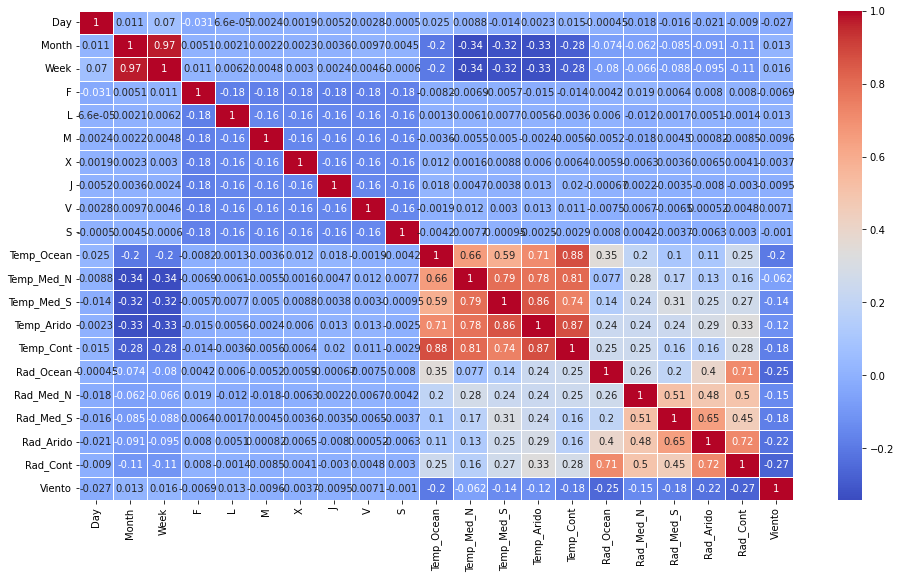

In [17]:
import seaborn as sns
correlation_matrix = exog_train_val_test.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# Regressive Models

In [18]:
# lags = [24*i-1 for i in range(2, ndays_base+1)] + [24*i for i in range(2, ndays_base+1)] + [24*i+1 for i in range(2, ndays_base+1)]
lags = [24*i for i in range(1, ndays_base+1)]
lags = sorted(lags)

# Functions that will be used later

In [19]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

def fit_model (y_,flag_exog,exog, lags=lags,model=XGBRegressor()):
    
    # Crear el forecaster
    # ==============================================================================
    forecaster = ForecasterAutoreg(
                     regressor = model,
                     lags = lags
                 )

    # Entrena el forecaster
    # ==============================================================================
    if flag_exog:
        forecaster.fit(y=pd.Series(y_), 
                         exog=exog)
    else:
        forecaster.fit(y=pd.Series(y_))
    
    return forecaster

In [20]:
def predict (forecaster, y_, start, npreds, flag_exog, exog, lags=lags,steps = 24):
    cont = 0
    preds_list = []
    start_window = start-max(lags)
    end_window = start
    while cont < npreds:
        window = pd.Series(y_[start_window:end_window])

        if flag_exog:
            window_exog = exog.loc[cont:cont+steps]
            window_exog = window_exog.reset_index(drop=True, inplace=False)
            window_exog.index = window_exog.index + len(window)
    #         print (window_exog)
            preds = forecaster.predict(steps=steps,last_window=window,exog=window_exog)

        else:
            preds = forecaster.predict(steps=steps,last_window=window)

        preds_list.append(list(preds))

        cont += steps
        start_window += steps
        end_window += steps

    predictions = [item for sublist in preds_list for item in sublist]
    
    return predictions

In [21]:
def scatter_predictions (y_,predictions):
    plt.title ('Real vs Predicted')
    plt.scatter(y_, predictions)
    plt.plot([min(min(y_),min(predictions)),max(max(y_),max(predictions))], [min(min(y_),min(predictions)),max(max(y_),max(predictions))])
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.show()

In [22]:
def plot_evolution (y_,predictions,prevision,ndias=100):
    plt.title ('Evolucion de predicciones')
    plt.plot(predictions[:ndias], label = 'XGB')
    plt.plot(y_[:ndias], label = 'Validation set')
    plt.plot(prevision[:ndias], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

In [23]:
def metrics (preds, val, normalized = normalization):
    df = {}
    if normalized:
        auxpreds = np.array(preds)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
        auxval = np.array(val)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
    else:
        auxpreds = np.array(preds)
        auxval = np.array(val)
#     all_hours = pd.date_range(start=df['Date'].min(), end=df['Date'].max() + pd.Timedelta(days=1), freq='H')[:-1]

    df['Datetime'] = demanda_meteo[(demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]['Datetime']
    df['Error'] = auxpreds-auxval
    df['Absolute Error'] = abs(df['Error'])
    df['Squared Error'] = (auxpreds-auxval)*(auxpreds-auxval)
    df['Relative Error'] = 100*abs((auxpreds-auxval)/auxval)
    overall = [np.sqrt(np.mean(df['Error']*df['Error'])), np.mean(df['Absolute Error']),np.mean(df['Relative Error']), max(df['Absolute Error'])]
    
    # Assuming your dictionary is named 'data_dict'
    # Concatenate dataframes from the dictionary into one large dataframe
#     combined_df = pd.concat([d.assign(datetime=pd.to_datetime(df['Datetime'], format='%d-%m-%Y') + pd.DateOffset(hours=hour)) 
#                              for hour, d in df.items()])
#     combined_df = pd.concat([d for d in df.items()])

    print([[name, len(df[name])] for name in df.keys()])
    df = pd.DataFrame(df)
    # Sort the dataframe by the datetime column
    df = df.sort_values(by='Datetime')

    # Convert datetime column to the desired format (day-month-year hour)
#     combined_df['Datetime'] = combined_df['Datetime'].dt.strptime(combined_df['Datetime'], '%Y-%m-%d %H:%M:%S')

    # Optionally, reset index if needed
    df = df.reset_index(drop=True)

    # Now, combined_df contains the concatenated and sorted dataframe with the desired datetime format,
    # where the hour comes from the key of the dictionary
    
    return df,overall
#     return combined_df

In [24]:
def shap_information (forecaster, y_, flag_exog, exog):
    if flag_exog:
        a, _ = forecaster.create_train_X_y(
            y=pd.Series(y_), 
            exog=exog)
    else:
        a, _ = forecaster.create_train_X_y(
            y=pd.Series(y_))
        
    explainer = shap.TreeExplainer(forecaster.regressor)
    shap_values = explainer.shap_values(a)
    shap.summary_plot(shap_values, a, plot_type="bar")
    shap.summary_plot(shap_values, a)
    return shap_values

### LGBM forecaster with exog

In [25]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# Crear el forecaster
# ==============================================================================
forecaster_exog = ForecasterAutoreg(
#                  regressor = LGBMRegressor(verbose=-1),
                 regressor = XGBRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags,
            )
             
# Entrena el forecaster
# ==============================================================================
forecaster_exog.fit(y=pd.Series(y_train+y_val), 
               exog = exog_train_val)
forecaster_exog

ForecasterAutoreg 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 
Lags: [ 24  48  72  96 120 144 168 192 216 240 264 288 312 336 360 384 408 432
 456 480 504 528 552 576 600 624 648 672] 
Transformer for y: None 
Transformer for exog: None 
Window size: 672 
Weight function included: Fal

In [26]:
exog_predictions = predict (forecaster_exog, y, len(y_train+y_val), len(y_test), True, exog_test)

In [27]:
df_exog, exog_metrics = metrics(exog_predictions, y_test)
exog_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[793.2025138323992, 570.9370375107546, 2.209481964553227, 5903.052829011111]

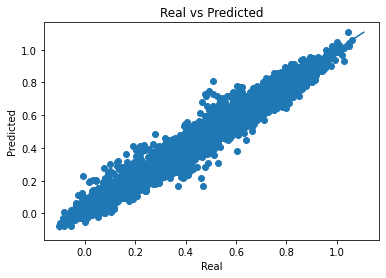

In [28]:
scatter_predictions (y_test,exog_predictions)

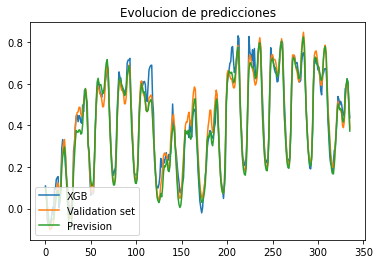

In [29]:
plot_evolution (y_test,exog_predictions,prevision_test,24*7*2)

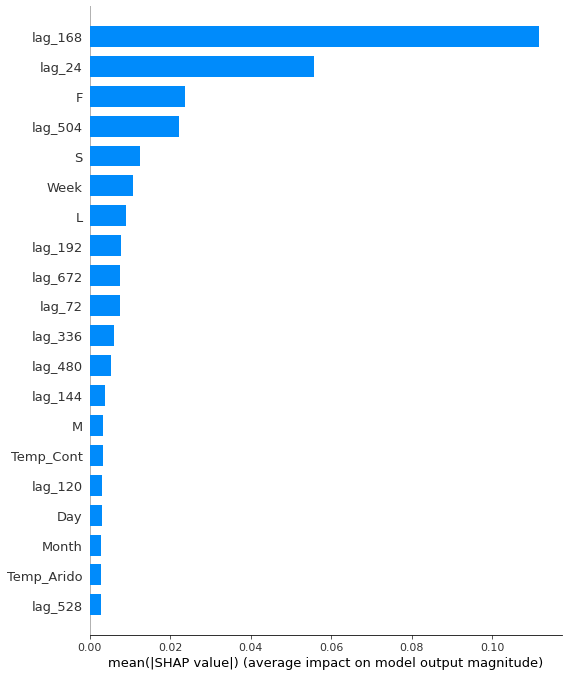

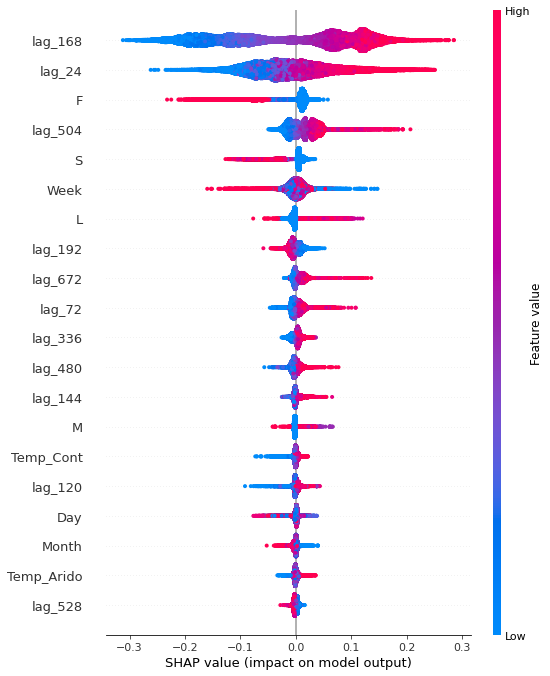

array([[-4.1522384e-03, -4.5205132e-05, -3.6699458e-03, ...,
         6.4890028e-04, -2.3583185e-04,  4.1398201e-03],
       [-1.2187733e-02, -4.2008204e-04, -2.8972512e-03, ...,
         9.9611236e-04, -9.7218021e-05,  2.1711334e-03],
       [-2.8253837e-02, -1.7947234e-04, -4.5626052e-03, ...,
         6.3253404e-04, -3.6217429e-05,  2.4020995e-03],
       ...,
       [ 1.3298912e-02, -5.1776780e-04,  5.9004491e-03, ...,
         6.4277108e-04, -3.9706819e-04, -9.8550587e-04],
       [-9.9459030e-03, -2.1670728e-03, -2.3381887e-03, ...,
         4.7184646e-04, -1.6731559e-04, -1.6884621e-03],
       [-3.9274182e-02,  3.1577612e-04, -5.1225489e-03, ...,
         3.4549387e-04, -3.2880713e-04, -1.6499483e-03]], dtype=float32)

In [30]:
shap_information (forecaster_exog, y_train+y_val, True, exog_train_val)

## LGBM with exog and hyperparameter optmization

In [31]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# Crear el forecaster
# ==============================================================================
forecaster_opt = ForecasterAutoreg(
#                  regressor = LGBMRegressor(verbose=-1),
                 regressor = XGBRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags,
            )
             
# Entrena el forecaster
# ==============================================================================
forecaster_opt.fit(y=pd.Series(y_train+y_val), 
               exog = exog_train_val)
# forecaster

In [32]:
from skforecast.model_selection import bayesian_search_forecaster

# Espacio de búsqueda de hiperparámetros
def search_space(trial):
    search_space  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 300, 1500, step=20),
        'max_depth'     : trial.suggest_int('max_depth', 3, 15, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.0001, 0.5, log=True),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0.001, 1, log=True),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0.001, 1, log=True),
        'subsample'    : trial.suggest_float('subsample', 0, 1),
    } 
    return search_space

resultados_busqueda, frozen_trial = bayesian_search_forecaster(
                                        forecaster         = forecaster_opt,
                                        y                  = pd.Series(y_train+y_val),
                                        exog               = exog_train_val,
                                        steps              = 1,
                                        metric             = 'mean_squared_error',
                                        search_space       = search_space,
                                        initial_train_size = len(y_train),
                                        refit              = False,
                                        n_trials           = 100, # Aumentar para una búsqueda más exhaustiva
#                                         random_state       = 123,
                                        return_best        = True,
                                        n_jobs             = 'auto',
                                        verbose            = False,
                                        show_progress      = True
                                    )

resultados_busqueda

Number of models compared: 100,
         100 bayesian search in each lag configuration.


lags grid:   0%|          | 0/1 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 24  48  72  96 120 144 168 192 216 240 264 288 312 336 360 384 408 432
 456 480 504 528 552 576 600 624 648 672] 
  Parameters: {'n_estimators': 1500, 'max_depth': 5, 'learning_rate': 0.10022658022283619, 'reg_alpha': 0.7007760344849776, 'reg_lambda': 0.0010885584577862892, 'subsample': 0.8939554993404226}
  Backtesting metric: 0.001148344232657262



,lags,params,mean_squared_error,n_estimators,max_depth,learning_rate,reg_alpha,reg_lambda,subsample
15,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1500, 'max_depth': 5, 'learni...",18813.252110,1500.0,5.0,0.100227,0.700776,0.001089,0.893955
91,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1240, 'max_depth': 5, 'learni...",18814.250405,1240.0,5.0,0.124086,0.619697,0.007734,0.877147
80,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1440, 'max_depth': 4, 'learni...",18814.736973,1440.0,4.0,0.096731,0.427206,0.008947,0.898520
42,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1440, 'max_depth': 5, 'learni...",18814.924001,1440.0,5.0,0.115407,0.323943,0.003820,0.721764
89,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1340, 'max_depth': 4, 'learni...",18815.074625,1340.0,4.0,0.122694,0.618949,0.011563,0.870348
...,...,...,...,...,...,...,...,...,...
5,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 400, 'max_depth': 8, 'learnin...",19513.095146,400.0,8.0,0.003924,0.030273,0.018945,0.312261
2,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 820, 'max_depth': 3, 'learnin...",19594.590794,820.0,3.0,0.002967,0.163676,0.003528,0.175452
0,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 1140, 'max_depth': 6, 'learni...",20487.345712,1140.0,6.0,0.000690,0.045076,0.144015,0.423106
8,"[24, 48, 72, 96, 120, 144, 168, 192, 216, 240,...","{'n_estimators': 920, 'max_depth': 10, 'learni...",21676.429035,920.0,10.0,0.000279,0.301316,0.064444,0.545068


In [33]:
opt_predictions = predict (forecaster_opt, y, len(y_train+y_val), len(y_test), True, exog_test)

In [34]:
df_opt, opt_metrics = metrics(opt_predictions, y_test)
opt_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[706.8235530140319, 505.85065144175337, 1.9592797064503709, 4322.45039244317]

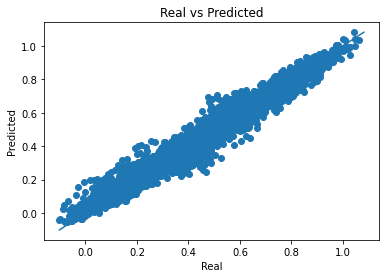

In [35]:
scatter_predictions (y_test,opt_predictions)

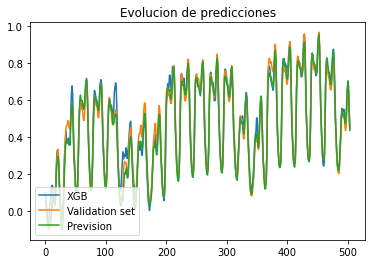

In [36]:
plot_evolution (y_test,opt_predictions,prevision_test,24*7*3)

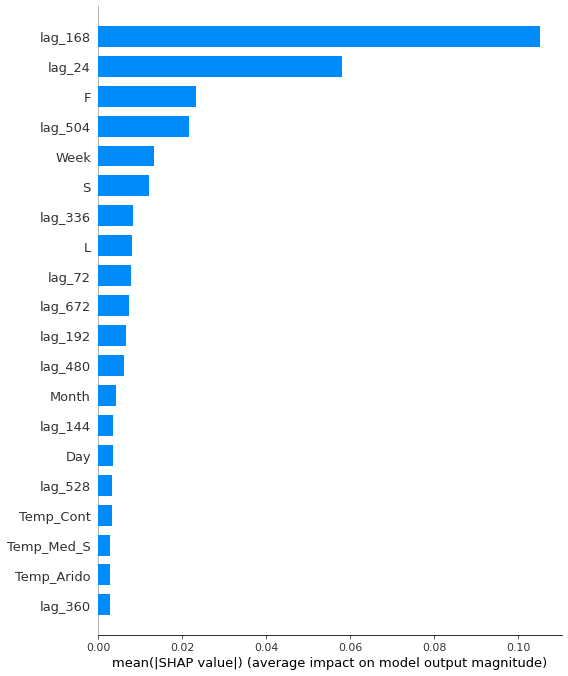

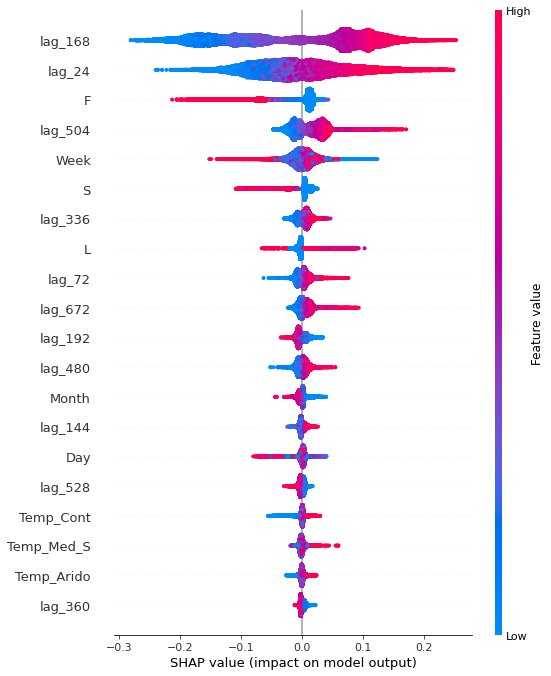

array([[ 2.47330568e-03, -7.69757025e-04, -6.16705627e-04, ...,
         6.28200825e-04, -6.05484129e-05,  5.44439023e-03],
       [-1.75480805e-02, -2.78599095e-03, -4.09639999e-03, ...,
         2.68445438e-04, -2.16010594e-04,  4.48080013e-03],
       [-2.88115405e-02, -2.89693032e-03, -7.22478516e-03, ...,
         1.11339745e-04, -1.88888574e-04,  5.23131900e-03],
       ...,
       [ 1.58005464e-03, -1.93625817e-03,  7.02889264e-03, ...,
        -7.07293453e-04, -5.05195349e-04, -2.47484772e-03],
       [-2.18206681e-02, -4.46727325e-04, -2.56747517e-05, ...,
        -4.04498394e-04, -4.79121751e-04, -2.45139352e-03],
       [-5.39884530e-02, -9.93365073e-04, -6.46179030e-03, ...,
        -4.76444577e-04, -6.79672288e-04, -2.72940774e-03]], dtype=float32)

In [37]:
shap_information (forecaster_opt, y_train+y_val, True, exog_train_val)

## Without exog

In [38]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# Crear el forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
#                  regressor = LGBMRegressor(verbose=-1),
                 regressor = XGBRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags,
            )
             
# Entrena el forecaster
# ==============================================================================
forecaster.fit(y=pd.Series(y_train+y_val))
# forecaster

In [39]:
normal_predictions = predict (forecaster, y, len(y_train+y_val), len(y_test), False, _)

In [40]:
df_normal, normal_metrics = metrics(normal_predictions, y_test)
normal_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1163.91603684759, 765.5248799685784, 2.9676870805944433, 10239.03128357813]

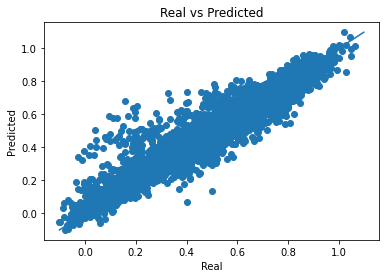

In [41]:
scatter_predictions (y_test,normal_predictions)

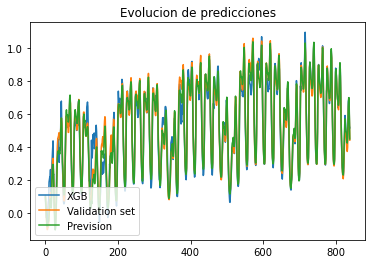

In [42]:
plot_evolution (y_test,normal_predictions,prevision_test,24*7*5)

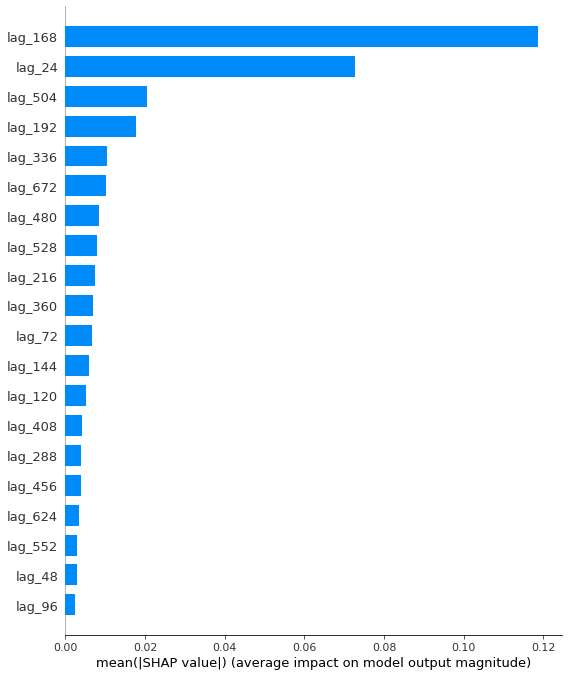

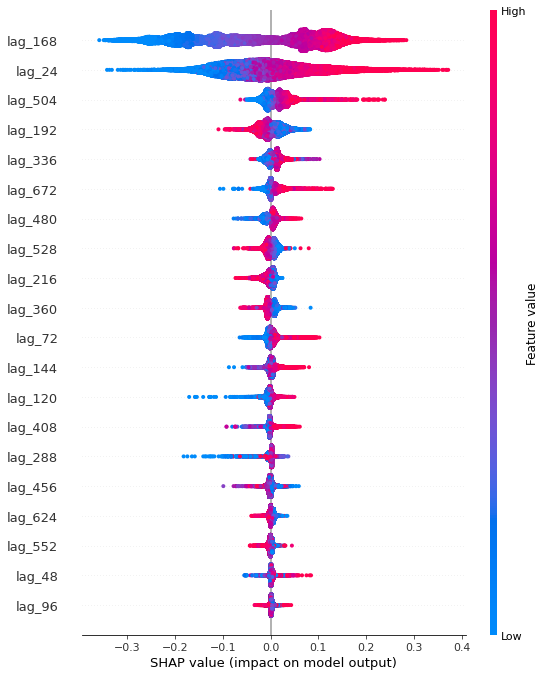

array([[-1.8716378e-03,  1.9620299e-04, -8.2598551e-04, ...,
         1.7444284e-03, -1.4437940e-03,  4.8639961e-03],
       [-2.6424350e-02,  5.9741118e-04, -3.8273325e-03, ...,
         6.7629660e-03, -1.9068276e-03,  6.9666625e-04],
       [-3.9421692e-02, -7.1480969e-04, -4.0465258e-03, ...,
         6.8364991e-03, -5.9820944e-04, -8.8322886e-05],
       ...,
       [-1.5721744e-02,  2.1913296e-03,  4.5904764e-03, ...,
        -1.1874130e-03, -7.8139477e-04,  2.1074081e-02],
       [-5.8599329e-03,  2.0208852e-03,  3.0696884e-04, ...,
         6.4776035e-04, -1.5701707e-03,  1.1785198e-02],
       [-7.3581740e-02,  1.3091343e-03, -6.7413934e-03, ...,
        -9.7882282e-04, -1.0440930e-03,  6.7218691e-03]], dtype=float32)

In [43]:
shap_information (forecaster, y_train+y_val, False, _)

# ESIOS predictions

In [44]:
df_esios, esios_metrics = metrics(prevision_test, y_test)
esios_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[517.991037936158, 376.33522067009125, 1.4245099154802383, 2840.2999999999993]

# Error analysis

In [45]:
errors = {}
# errors['Standard'] = normal_metrics
errors['With exogenous'] = exog_metrics
errors['Tuning'] = opt_metrics
errors ['Esios'] = esios_metrics
errors = pd.DataFrame (errors)

errors = errors.rename(index={0: 'RMSE', 1: 'MAE', 2:'MAPE', 3:'MAX'})

errors

,With exogenous,Tuning,Esios
RMSE,793.202514,706.823553,517.991038
MAE,570.937038,505.850651,376.335221
MAPE,2.209482,1.959280,1.424510
MAX,5903.052829,4322.450392,2840.300000


In [46]:
df_errors = {}
# df_errors ['Standard'] = df_normal
df_errors ['With exogenous'] = df_exog
df_errors ['Tuning'] = df_opt
df_errors ['Esios'] = df_esios

In [47]:
def hourly_error (type_of_error):
    colors = {'Standard': 'blue', 'With exogenous': 'orange', 'Tuning': 'green', 'Esios':'red'}
    errors_horas = {name:[] for name in df_errors.keys()}
    for name in errors_horas.keys():
        for i in range (24):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour == i]
            if type_of_error == 'RMSE':
                errors_horas[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_horas[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_horas[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_horas[name].append(max(auxdf['Relative Error']))
        plt.plot(errors_horas[name], label=name, c=colors[name])
            
    errors_horas = pd.DataFrame (errors_horas)
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Hour')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()
    return errors_horas

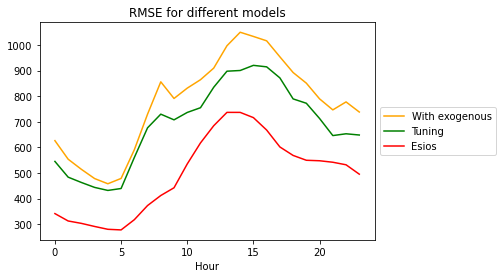

In [48]:
errors_horas_rmse = hourly_error ('RMSE')

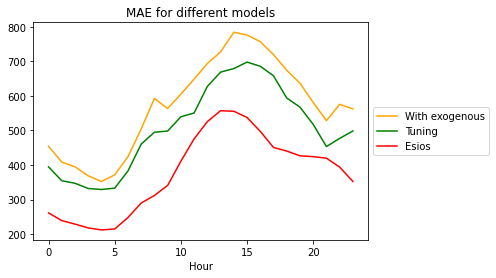

In [49]:
errors_horas_mae = hourly_error ('MAE')

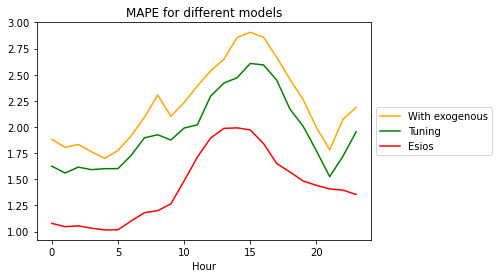

In [50]:
errors_horas_mape = hourly_error ('MAPE')

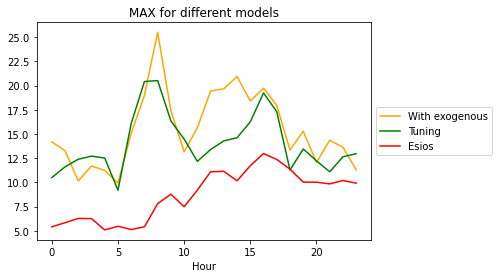

In [51]:
errors_horas_max = hourly_error ('MAX')

In [52]:
def weekly_error(type_of_error):
    errors_weekly = {name: [] for name in df_errors.keys()}
    colors = {'Standard': 'blue', 'With exogenous': 'orange', 'Tuning': 'green', 'Esios':'red'}
    for name in errors_weekly.keys():
        for i in range(7):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.weekday == i]
            if type_of_error == 'RMSE':
                errors_weekly[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_weekly[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_weekly[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_weekly[name].append(max(auxdf['Absolute Error']))

    # Plot each set of errors separately
    for name, errors in errors_weekly.items():
        plt.plot(range(7), errors, label=name, c=colors[name])  # Assuming 0-6 corresponds to Monday-Sunday
        
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Day of the week')
    plt.xticks(range(7), ['L', 'M', 'X', 'J', 'V', 'S', 'D'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    errors_weekly = pd.DataFrame(errors_weekly)
    return errors_weekly

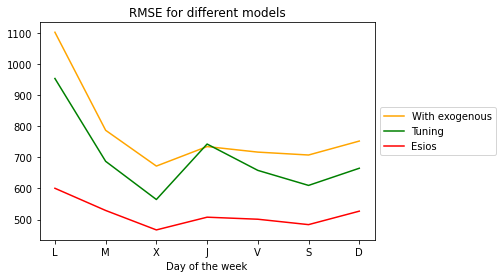

In [53]:
errors_weekly_rmse = weekly_error ('RMSE')

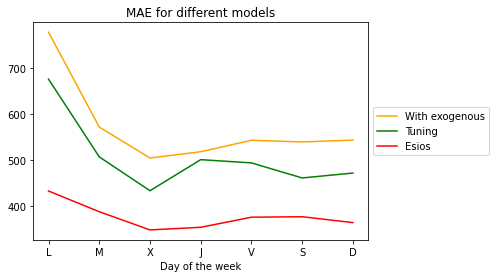

In [54]:
errors_weekly_rmse = weekly_error ('MAE')

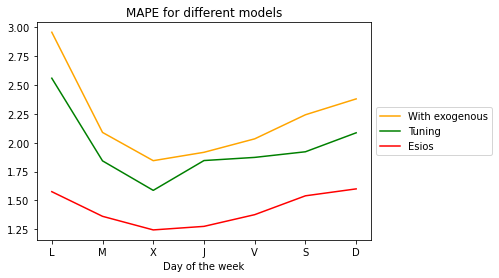

In [55]:
errors_weekly_rmse = weekly_error ('MAPE')

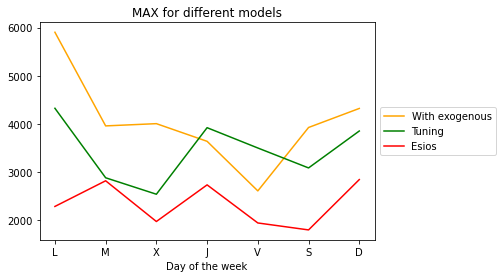

In [56]:
errors_weekly_rmse = weekly_error ('MAX')

### Histograms

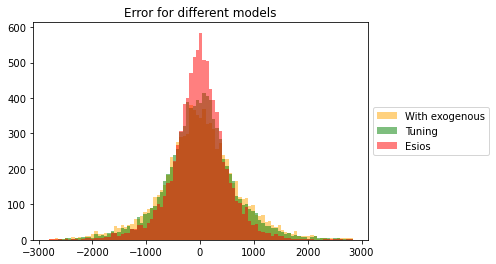

In [57]:
hist = {}

nbins = int (np.sqrt(len(y_test)))
# print (nbins)

for name in df_errors.keys():
    max_value = 0
    min_value = 0
    if max(df_errors[name]['Error']) >= max_value:
        max_value = max(df_errors[name]['Error'])
    if min(df_errors[name]['Error']) <= min_value:
        min_value = min(df_errors[name]['Error'])
bin_edges = np.linspace(min_value, max_value, nbins + 1)

plt.title('Error for different models')
for name in df_errors.keys():
    colors = {'Standard': 'blue', 'With exogenous': 'orange', 'Tuning': 'green', 'Esios':'red'}
    plt.hist(df_errors[name]['Error'], bins = bin_edges, label=name, alpha=0.5, color=colors[name])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [58]:
variables = ['mean', 'sigma', 'mean+-1sigma', 'mean+-2sigma', 'mean+-3sigma', 'mean+-4sigma']
nsigmas = 4

error_stats = pd.DataFrame()

for name in df_errors.keys():
    aux = []
    length = len(df_errors[name])
    mean = np.mean(df_errors[name]['Error'])
    aux.append(mean)
    sigma = np.std(df_errors[name]['Error'])
    aux.append(sigma)
    for n in range(1,nsigmas+1):
        auxdf = df_errors[name][(df_errors[name]['Error']>=mean-n*sigma) & (df_errors[name]['Error']<=mean+n*sigma)]
        aux.append(len(auxdf)/length)
    error_stats [name] = aux

error_stats.index = variables
error_stats

,With exogenous,Tuning,Esios
mean,8.439608,-1.735304,-16.931545
sigma,793.157614,706.821423,517.714244
mean+-1sigma,0.758105,0.766324,0.752397
mean+-2sigma,0.947603,0.944635,0.941781
mean+-3sigma,0.987100,0.984589,0.986301
mean+-4sigma,0.995890,0.994406,0.996918


In [59]:
stats_without_outliers = pd.DataFrame()

n = 4
for name in df_errors.keys():
    sigma = np.std(df_errors[name]['Error'])
    auxdf = df_errors[name][(df_errors[name]['Error']>=mean-n*sigma) & (df_errors[name]['Error']<=mean+n*sigma)]
    overall = [round (np.sqrt(np.mean(auxdf['Error']*auxdf['Error'])),1), 
               round (np.mean(auxdf['Absolute Error']),1),
               round (np.mean(auxdf['Relative Error']),2), 
               len(df_errors[name])-len(auxdf)]
    stats_without_outliers [name] = overall
#     print (name,overall)
    
stats_without_outliers = stats_without_outliers.rename(index={0: 'RMSE', 1: 'MAE', 2:'MAPE', 3:'Number of outliers'})
stats_without_outliers

,With exogenous,Tuning,Esios
RMSE,750.80,663.40,500.3
MAE,556.60,490.10,369.9
MAPE,2.15,1.89,1.4
Number of outliers,37.00,49.00,27.0


In [60]:
# day_division = {
#     'Night': [x for x in range (6)],
#     'Morning': [x for x in range (6,12)],
#     'Lunch': [x for x in range (12, 18)],
#     'Afternoon': [x for x in range (18,24)]
    
# }

# nbins = int (np.sqrt(len(y_test)))
# # print (nbins)

# for name in df_errors.keys():
#     plt.title('Error for different periods of the day for '+name+' model')
#     max_value = 0
#     min_value = 0
#     for period in day_division.keys():
#         auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
#         if max(auxdf['Error']) >= max_value:
#             max_value = max(auxdf['Error'])
#         if min(auxdf['Error']) <= min_value:
#             min_value = min(auxdf['Error'])
#     bin_edges = np.linspace(min_value, max_value, nbins + 1)
#     for period in day_division.keys():
#         auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
#         plt.hist(auxdf['Error'], bins = bin_edges, label=period, alpha=0.5)
#         plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()

In [61]:
from scipy.stats import kstest

kstest(exog_predictions,opt_predictions)

KstestResult(statistic=0.007762557077625571, pvalue=0.9544900016797679)